The objective of the analysis is to answer the following questions

* What was the day when Dogecoin was on lowest price?
* What was the day when Dogecoin was on highest price?
* Correlation between various attributes in dataset.
* Yearwise mean price

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [3]:
doge = pd.read_csv('Dogecoin Historical Data.csv')
doge.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 07, 2021",0.573179,0.579819,0.598133,0.519357,14.72B,-1.15%
1,"May 06, 2021",0.579839,0.653501,0.663006,0.541526,12.97B,-11.52%
2,"May 05, 2021",0.655355,0.559521,0.693839,0.536232,28.03B,17.24%
3,"May 04, 2021",0.559005,0.438349,0.594039,0.398416,31.90B,27.56%
4,"May 03, 2021",0.438244,0.372467,0.443181,0.372467,9.97B,17.68%


In [7]:
doge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1435 non-null   object 
 1   Price     1435 non-null   float64
 2   Open      1435 non-null   float64
 3   High      1435 non-null   float64
 4   Low       1435 non-null   float64
 5   Vol.      1435 non-null   object 
 6   Change %  1435 non-null   object 
dtypes: float64(4), object(3)
memory usage: 78.6+ KB


In [8]:
#remove the % sign for values in the change % column
doge['Change %'] = doge['Change %'].str.replace('%','').str.replace(',','').astype(float)

In [9]:
doge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1435 non-null   object 
 1   Price     1435 non-null   float64
 2   Open      1435 non-null   float64
 3   High      1435 non-null   float64
 4   Low       1435 non-null   float64
 5   Vol.      1435 non-null   object 
 6   Change %  1435 non-null   float64
dtypes: float64(5), object(2)
memory usage: 78.6+ KB


In [11]:
doge.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,"May 07, 2021",0.573179,0.579819,0.598133,0.519357,14.72B,-1.15
1,"May 06, 2021",0.579839,0.653501,0.663006,0.541526,12.97B,-11.52
2,"May 05, 2021",0.655355,0.559521,0.693839,0.536232,28.03B,17.24
3,"May 04, 2021",0.559005,0.438349,0.594039,0.398416,31.90B,27.56
4,"May 03, 2021",0.438244,0.372467,0.443181,0.372467,9.97B,17.68


In [13]:
doge.describe()

,Price,Open,High,Low,Change %
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,0.011895,0.011497,0.013001,0.010444,5.062732
std,0.048844,0.046533,0.053560,0.041342,163.961446
min,0.000774,0.000774,0.000793,0.000669,-98.430000
25%,0.002301,0.002301,0.002362,0.002212,-2.410000
50%,0.002746,0.002747,0.002836,0.002634,-0.040000
75%,0.003638,0.003634,0.003823,0.003451,2.145000
max,0.655355,0.653501,0.693839,0.541526,6191.550000


What day was doge coin at it's lowest price?

In [14]:
doge[doge['Price']==doge['Price'].min()][['Date','Price']]

,Date,Price
1323,"Sep 22, 2017",0.000774


What day was doge coin at it's highest price?

In [16]:
doge[doge['Price']==doge['Price'].max()][['Date','Price']]

,Date,Price
2,"May 05, 2021",0.655355


Correlation between various attributes in dataset

In [19]:
print(doge.corr())

             Price      Open      High       Low  Change %
Price     1.000000  0.977760  0.993084  0.987807  0.082484
Open      0.977760  1.000000  0.982604  0.989810 -0.002414
High      0.993084  0.982604  1.000000  0.978617  0.089781
Low       0.987807  0.989810  0.978617  1.000000  0.000392
Change %  0.082484 -0.002414  0.089781  0.000392  1.000000


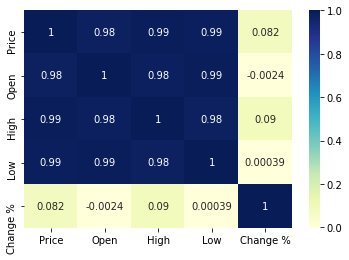

In [22]:
#plot heatmap of the correlation
plot = sns.heatmap(doge.corr(), cmap='YlGnBu', annot = True)
plt.show()

Yearwise mean price

In [26]:
doge['year'] = doge['Date'].apply(lambda x: x[-4:]).astype(int)

In [30]:
doge.groupby('year')['Price'].mean()

year
2017    0.002272
2018    0.004350
2019    0.002576
2020    0.003135
2021    0.101671
Name: Price, dtype: float64

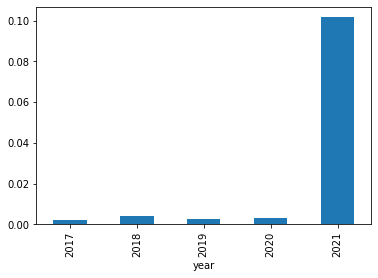

In [31]:
doge.groupby('year')['Price'].mean().plot(kind='bar')